In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd/content/gdrive/MyDrive/708

/content/gdrive/MyDrive/708


In [3]:
ls

 707AssignmentNo2.docx                                'GDDA708_Assessment 2_2023_v1.0.pdf'
 708Assignment2.docx                                   heart-attack-analysis-and-predict.ipynb
 708Assignment2.ipynb                                 'K folder cross volidation.ipynb'
 708Assignment2_V2.docx                                LOOCV.ipynb
'Connect_MongoDB and load data as dataframe-1.ipynb'  'Machine Learning.docx'
 Diabetes/                                             Melbourne_housing_FULL.csv
'diabetes (1).csv'                                     MongoDB_connection_loading_saving-1.ipynb
 diabetes-dataset-for-beginners.ipynb                 'MongoDB database.ipynb'
'diebetes-prediction-model (1).ipynb'                  PartA_708A2.ipynb
 diebetes-prediction-model.ipynb                       PartB_708A2.ipynb
'Evaluating model correctness.ipynb'                   wine+quality/


In [80]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [81]:
# Load Melbourne housing dataset from the CSV file into a DataFrame
df = pd.read_csv("Melbourne_housing_FULL.csv")

# Display the first few rows of the DataFrame to verify the data
print(df.head())

       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             R

**TASK A : Data Preprocessing**

In [82]:
#check the shape of the data
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

**a,Clean the dataset**

In [83]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64


In [84]:
# Remove rows with null values in the 'Price' column
df.dropna(subset=['Price'], inplace=True)

In [85]:
# Select only numeric columns for imputation
numeric_columns = df.select_dtypes(include=['number'])

# Impute missing numerical values with median
df[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())

In [86]:
# Define a threshold for outlier detection (e.g., z-score > 3)
z_threshold = 3

# Calculate z-scores for each numerical column
z_scores = stats.zscore(df.select_dtypes(include=['number']))

# Identify outliers by z-score
outliers = (abs(z_scores) > z_threshold).any(axis=1)

# Remove outliers from the DataFrame
df_no_outliers = df[~outliers]

# Check the shape of the DataFrame after removing outliers
print("Shape after removing outliers:", df_no_outliers.shape)

Shape after removing outliers: (23805, 21)


In [87]:
df = df_no_outliers.copy()

In [88]:
df.shape

(23805, 21)

In [89]:
#Check data types

df.dtypes

,0
Suburb,object
Address,object
Rooms,int64
Type,object
Price,float64
Method,object
SellerG,object
Date,object
Distance,float64
Postcode,float64


In [90]:
# Check the number of duplicate rows
print("Number of duplicate rows before removing duplicates:", df.duplicated().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Check the number of duplicate rows after removing duplicates
print("Number of duplicate rows after removing duplicates:", df.duplicated().sum())

Number of duplicate rows before removing duplicates: 0
Number of duplicate rows after removing duplicates: 0


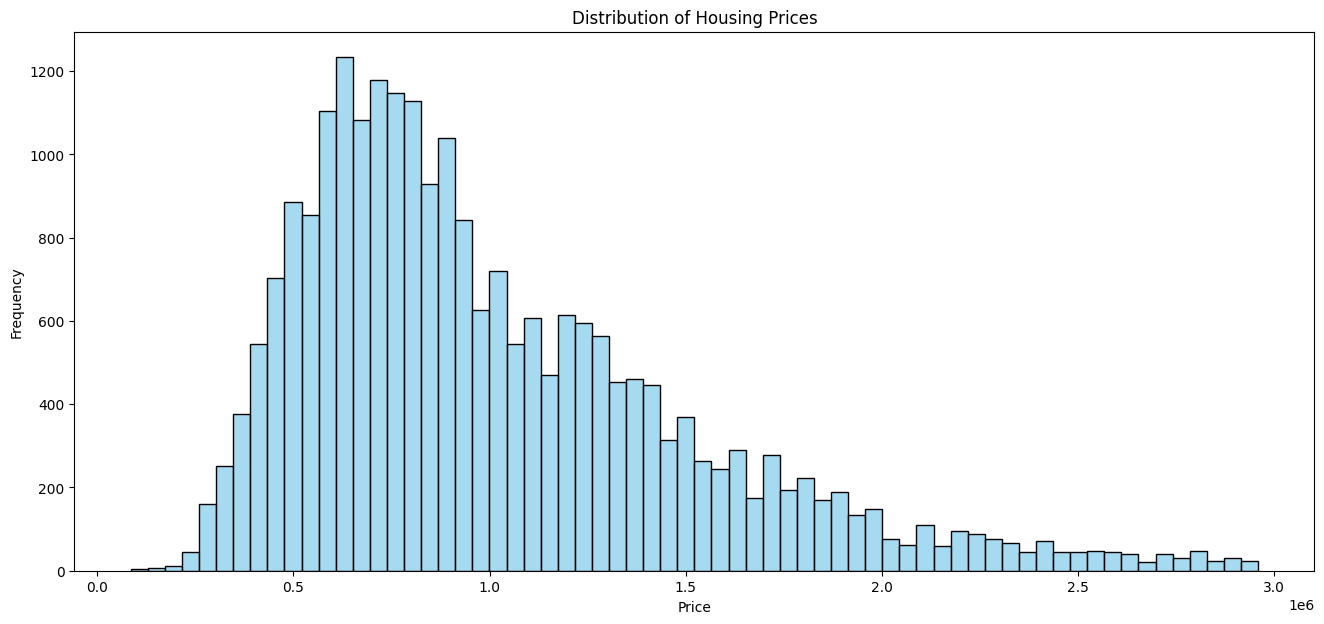

In [91]:
#Visualisation
# Set up the figure size
plt.figure(figsize=(16, 7))

# Plot the histogram using Seaborn
sns.histplot(df['Price'], kde=False, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Housing Prices')

# Show plot
plt.show()

**b,Perform feature scaling, normalisation**

In [92]:
# 3. Correlation Analysis (for numerical features)
# Select only numerical columns before calculating correlation
numerical_df = df.select_dtypes(include=['float', 'int'])

# Calculate the correlation between numerical features and the target variable
correlation_matrix = numerical_df.corr()
correlation_with_price = correlation_matrix['Price'].sort_values(ascending=False)

print("Correlation with Price:")
print(correlation_with_price)

Correlation with Price:
Price            1.000000
Rooms            0.499110
Bedroom2         0.403485
Bathroom         0.360399
BuildingArea     0.304852
Postcode         0.273162
Longtitude       0.202364
Car              0.165845
Landsize         0.092267
Propertycount   -0.006773
Distance        -0.141089
YearBuilt       -0.229585
Lattitude       -0.241532
Name: Price, dtype: float64


In [93]:
# Select the features and target variable
selected_features =['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']
X = df[selected_features]  # Features
y = df['Price']  # Target variable

# Select the subset of features to scale
features_to_scale = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']
X_subset = df[features_to_scale]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the subset of features and transform them
X_scaled = scaler.fit_transform(X_subset)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=features_to_scale)

# Display the scaled features
print("Scaled features:")
print(X_scaled_df.head())

Scaled features:
   Rooms  Distance  Bedroom2  Bathroom   Car  Landsize  BuildingArea  \
0   0.25  0.080128      0.25  0.333333  0.25  0.021632      0.138831   
1   0.25  0.080128      0.25  0.333333  0.00  0.016706      0.082463   
2   0.50  0.080128      0.50  0.666667  0.00  0.014350      0.156576   
3   0.50  0.080128      0.50  0.666667  0.25  0.010066      0.138831   
4   0.75  0.080128      0.50  0.333333  0.50  0.012851      0.148225   

   YearBuilt  
0   0.604839  
1   0.040323  
2   0.040323  
3   0.604839  
4   0.959677  


In [94]:
# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate over each categorical column and apply label encoding
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
print(df.head())

   Suburb  Address  Rooms  Type      Price  Method  SellerG  Date  Distance  \
1       0    22438      2     0  1480000.0       1       28    60       2.5   
2       0    10686      2     0  1035000.0       1       28    63       2.5   
4       0    17419      3     0  1465000.0       3       28    64       2.5   
5       0    16150      3     0   850000.0       0       28    64       2.5   
6       0    18773      4     0  1600000.0       4      181    65       2.5   

   Postcode  ...  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
1    3067.0  ...       1.0  1.0     202.0         133.0     1970.0   
2    3067.0  ...       1.0  0.0     156.0          79.0     1900.0   
4    3067.0  ...       2.0  0.0     134.0         150.0     1900.0   
5    3067.0  ...       2.0  1.0      94.0         133.0     1970.0   
6    3067.0  ...       1.0  2.0     120.0         142.0     2014.0   

   CouncilArea  Lattitude  Longtitude  Regionname  Propertycount  
1           26   -37.7996    144.9984

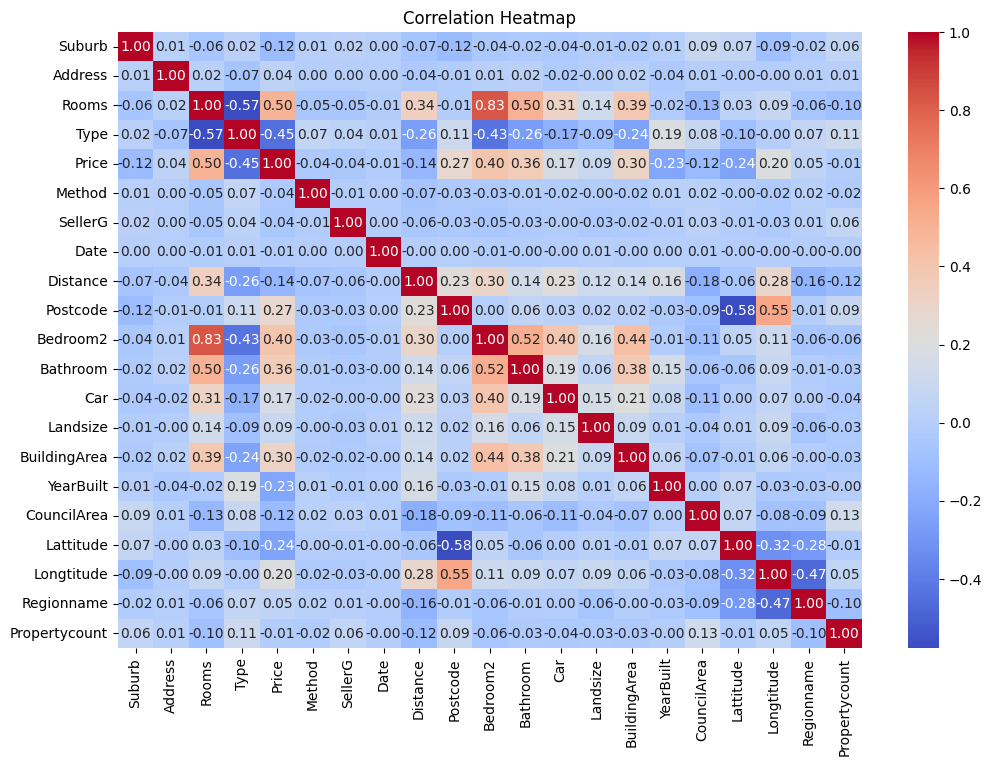

In [100]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(12, 8))

# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Heatmap')

# Show plot
plt.show()

In [96]:
# Select the features and target variable
selected_features = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']
X = df[selected_features]  # Features
y = df['Price']  # Target variable

In [97]:
# Select the subset of features to scale
features_to_scale = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']
X_subset = df[features_to_scale]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the subset of features and transform them
X_scaled = scaler.fit_transform(X_subset)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=features_to_scale)

# Display the scaled features
print("Scaled features:")
print(X_scaled_df.head())

Scaled features:
   Rooms  Distance  Bedroom2  Bathroom   Car  Landsize  BuildingArea  \
0   0.25  0.080128      0.25  0.333333  0.25  0.021632      0.138831   
1   0.25  0.080128      0.25  0.333333  0.00  0.016706      0.082463   
2   0.50  0.080128      0.50  0.666667  0.00  0.014350      0.156576   
3   0.50  0.080128      0.50  0.666667  0.25  0.010066      0.138831   
4   0.75  0.080128      0.50  0.333333  0.50  0.012851      0.148225   

   YearBuilt  
0   0.604839  
1   0.040323  
2   0.040323  
3   0.604839  
4   0.959677  


**Task 2 - Model Building and hyper-parameter tuning**

In [101]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (19044, 8) (19044,)
Testing set size: (4761, 8) (4761,)


**2.a,Linear Regression Modelling**

In [102]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

# Coefficients
print('Coefficients:', model.coef_)

Mean Absolute Error: 288342.2106800085
Mean Squared Error: 144466926699.43552
R-squared: 0.4273529662789548
Coefficients: [ 3.22147225e+05 -2.95638709e+04 -1.04476338e+05  1.41980057e+05
  5.18746752e+04  5.24821535e+01  1.31203155e+03 -4.94035725e+03]


**2.b, Grid search and Random Search**

**Grid Search**

In [110]:
# Grid search RandomForestRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor()

# Define the parameter grid
param_grid = {
  'n_estimators': [50, 150],
  'max_depth': [None, 5, 30],
  'min_samples_split': [5, 10],
  'min_samples_leaf': [3, 9]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}, R2: {r2}')

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 150}
MAE: 211346.28293225073, MSE: 91911810445.82294, R2: 0.6356742209569193


**c.RandomForestRegressor  Model**

In [123]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Define Model
RFRModel = RandomForestRegressor(n_estimators=100, random_state=15)

#Train the model
RFRModel.fit(X_train, y_train)

#Predict and Evaluate
RFRModel_predicted = RFRModel.predict(X_test)
RFRModel_score = RFRModel.score(X_test, y_test)

mae = mean_absolute_error(y_test, RFRModel_predicted)
mse = mean_squared_error(y_test, RFRModel_predicted)
r2 = r2_score(y_test, RFRModel_predicted)

print(f'MAE: {mae}, MSE: {mse}, R2: {r2}')
print("R2 Score: ", RFRModel_score)

MAE: 213950.81393067102, MSE: 95306697305.16566, R2: 0.6222173562319859


**Task 3 - b. K-FOLD Cross Validation**

In [117]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
# Load Melbourne home price dataset


In [112]:
# Define a linear regression model
model = LinearRegression()

In [113]:
# Define a function that uses different K values for k-fold cross-validation
def evaluate_model_with_kfold(X, y, k_values):
    results = {}
    for k in k_values:
        print(f"Evaluating with K={k}")
        # Initialize the KFold object with the current K value
        kfold = KFold(n_splits=k, shuffle=True, random_state=42)
        try:
            # Use cross_val_score for cross validation
            scores = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
            # Calculate the mean MSE and standard deviation for each K value
            mean_score = np.mean(scores)
            std_score = np.std(scores)
            results[k] = (mean_score, std_score)
            # Print detailed results for each K value
            print(f"Mean MSE: {-mean_score:.2f}, Standard Deviation: {std_score:.2f}\n")
        except Exception as e:
            print(f"Error with K={k}: {e}")
    return results

In [121]:
# Define a list of K values to evaluate
k_values = [5, 10, 20]  # Adding a large K value may raise an error

In [122]:
# Evaluate the model using defined K values
results = evaluate_model_with_kfold(X, y, k_values)


Evaluating with K=5
Mean MSE: 143731105645.32, Standard Deviation: 2186749104.13

Evaluating with K=10
Mean MSE: 143708667370.24, Standard Deviation: 6274180400.84

Evaluating with K=20
Mean MSE: 143683396173.16, Standard Deviation: 8554678422.04



In [119]:
# Print results summary
print("Summary of results:")
for k, (mean, std) in results.items():
    print(f"K={k}: Mean MSE={-mean:.2f}, Std={std:.2f}")

Summary of results:
K=5: Mean MSE=143731105645.32, Std=2186749104.13
K=10: Mean MSE=143708667370.24, Std=6274180400.84
K=20: Mean MSE=143683396173.16, Std=8554678422.04
